In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Вихідні дані
a = 19 * 10**(-6)  # meters
L = 1.5  # meters
T = 4.5 * 3600  # seconds
N = 100
h = 5 # seconds
alpha = 15
beta = 34

### Розв'язок за допомогою системи звичайних диф-рівнянь

In [69]:
# Функція для системи рівнянь
def heat_equation_system(u, mu, alpha, beta, N):
  du_dt = np.zeros(N)
  du_dt[0] = mu * (u[1] - 2 * u[0] + alpha)
  for i in range(1, N - 1):
    du_dt[i] = mu * (u[i + 1] - 2 * u[i] + u[i - 1])
  du_dt[-1] = mu * (beta - 2 * u[-1] + u[-2])
  return du_dt

# Метод Рунге-Кутта 4-го порядку
def runge_kutta_4(f, u0, t_values, mu, alpha, beta, N):
  num_steps = len(t_values)
  u_values = np.zeros((num_steps, N))
  u_values[0] = u0
  
  for i in range(num_steps - 1):
    h = t_values[i + 1] - t_values[i]
    u = u_values[i]

    k1 = h * f(u, mu, alpha, beta, N)
    k2 = h * f(u + k1 / 2, mu, alpha, beta, N)
    k3 = h * f(u + k2 / 2, mu, alpha, beta, N)
    k4 = h * f(u + k3, mu, alpha, beta, N)

    u_values[i + 1] = u + (k1 + 2 * k2 + 2 * k3 + k4) / 6
  
  return t_values, u_values

In [70]:
delta = L / N  # крок по простору
mu = a / (delta ** 2)  # коефіцієнт теплопровідності

# Початкові умови
t_values = np.arange(0, T + h, h)
u0 = np.zeros(N)  # Початково температура в стінці всюди нульова

t_values, y_values = runge_kutta_4(heat_equation_system, u0, t_values, mu, alpha, beta, N)

In [71]:
print("u'1(t) =", np.round(mu * 1000) / 1000, "* ( u2(t) - 2*u1(t) +", alpha, ")", )
print("u'2(t) =", np.round(mu * 1000) / 1000, "* ( u3(t) - 2*u2(t) + u1(t) )")
print("u'3(t) =", np.round(mu * 1000) / 1000, "* ( u4(t) - 2*u3(t) + u2(t) )")
print("u'4(t) =", np.round(mu * 1000) / 1000, "* (", beta, "- 2*u4(t) + u3(t) )")

u'1(t) = 0.084 * ( u2(t) - 2*u1(t) + 15 )
u'2(t) = 0.084 * ( u3(t) - 2*u2(t) + u1(t) )
u'3(t) = 0.084 * ( u4(t) - 2*u3(t) + u2(t) )
u'4(t) = 0.084 * ( 34 - 2*u4(t) + u3(t) )


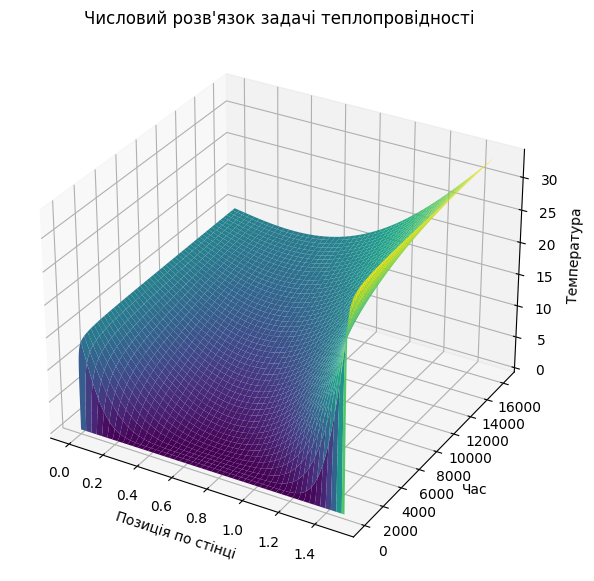

In [72]:
# Візуалізація числового розв'язку
X, Y = np.meshgrid(np.linspace(0, L, N), t_values)
Z = y_values

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Площа 3D графіку
ax.plot_surface(X, Y, Z, cmap='viridis')

# Параметри графіка
ax.set_xlabel('Позиція по стінці')
ax.set_ylabel('Час')
ax.set_zlabel('Температура')
ax.set_title('Числовий розв\'язок задачі теплопровідності')


plt.show()
